<a href="https://colab.research.google.com/github/MathewBiddle/H3_indicators/blob/main/read_and_plot_geojson_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd


In [2]:
url = 'https://raw.githubusercontent.com/NOAA-GIS4Ocean/H3_indicators/main/data/indicators_all_res1.geojson'

gdf = gpd.read_file(url)

gdf

,h3_index,hexid,n,sp,shannon,simpson,maxp,es,hill_1,hill_2,hill_inf,geometry
0,8102bffffffffff,8102bffffffffff,541,52,3.225842,0.060376,0.160813,22.044513,25.174751,16.562786,6.218391,"POLYGON ((-129.04689 78.00336, -145.35544 75.4..."
1,810c3ffffffffff,810c3ffffffffff,7813,637,5.465580,0.008567,0.043005,42.260848,236.412839,116.726109,23.252976,"POLYGON ((-163.87297 68.21922, -169.09172 64.2..."
2,810c7ffffffffff,810c7ffffffffff,103065,1804,5.226532,0.015302,0.067695,38.247108,186.146098,65.351931,14.772108,"POLYGON ((-149.20252 63.94824, -155.36074 60.7..."
3,810cbffffffffff,810cbffffffffff,87564,1295,4.661000,0.023627,0.071159,33.431785,105.741787,42.324887,14.052961,"MULTIPOLYGON (((178.57999 59.03217, 180 61.652..."
4,810cfffffffffff,810cfffffffffff,249297,1643,4.257823,0.039295,0.135272,30.083146,70.656017,25.448819,7.392492,"POLYGON ((-164.06559 60.72913, -168.02629 56.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
60,81713ffffffffff,81713ffffffffff,622,79,2.562955,0.179403,0.381029,15.715938,12.974099,5.574055,2.624473,"POLYGON ((-175.45827 15.28573, -176.35807 11.0..."
61,81717ffffffffff,81717ffffffffff,203,45,3.316207,0.048946,0.113300,24.018168,27.555641,20.430838,8.826087,"POLYGON ((-168.17289 13.4456, -169.29313 9.060..."
62,8171bffffffffff,8171bffffffffff,21,17,2.714452,0.079365,0.190476,NaN,15.096340,12.600000,5.250000,"MULTIPOLYGON (((179.21716 5.88992, 179.77693 9..."
63,817ebffffffffff,817ebffffffffff,35,26,3.000830,0.077551,0.228571,NaN,20.102221,12.894737,4.375000,"MULTIPOLYGON (((177.85729 -1.64692, 176.15597 ..."


Make a log scale.

In [3]:
import numpy as np

gdf['log10_n'] = np.log10(gdf['n'])

<Axes: >

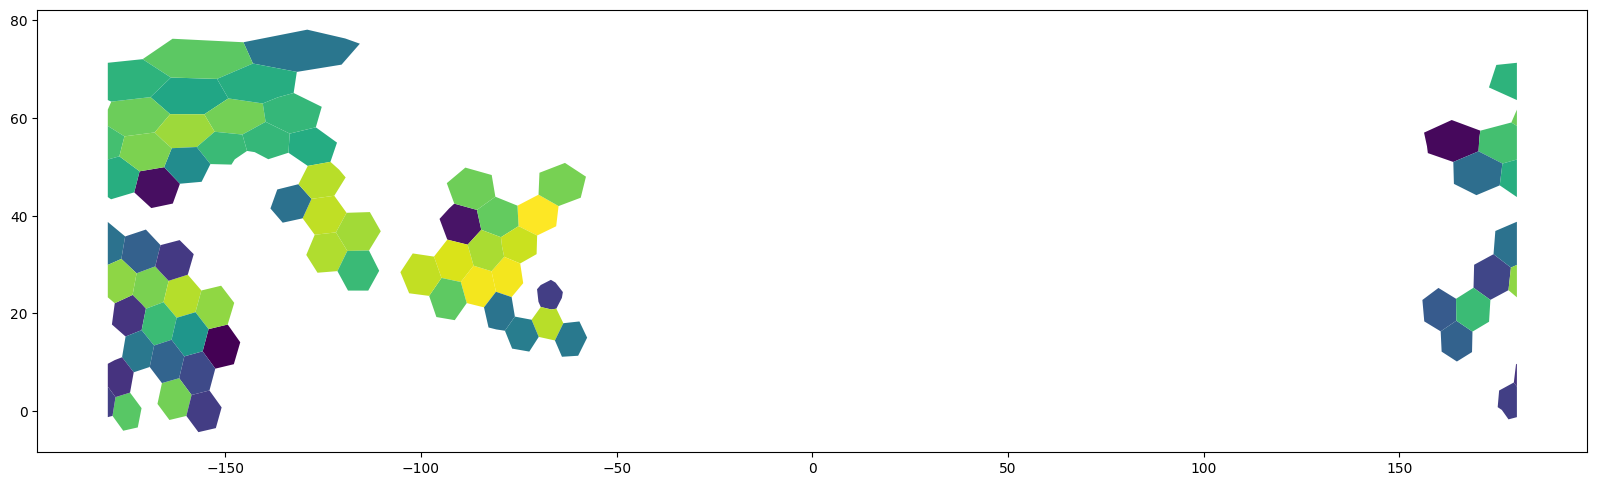

In [4]:
gdf.plot(column='log10_n',
         figsize=(20, 20),
         #legend=True,
         )

<Axes: >

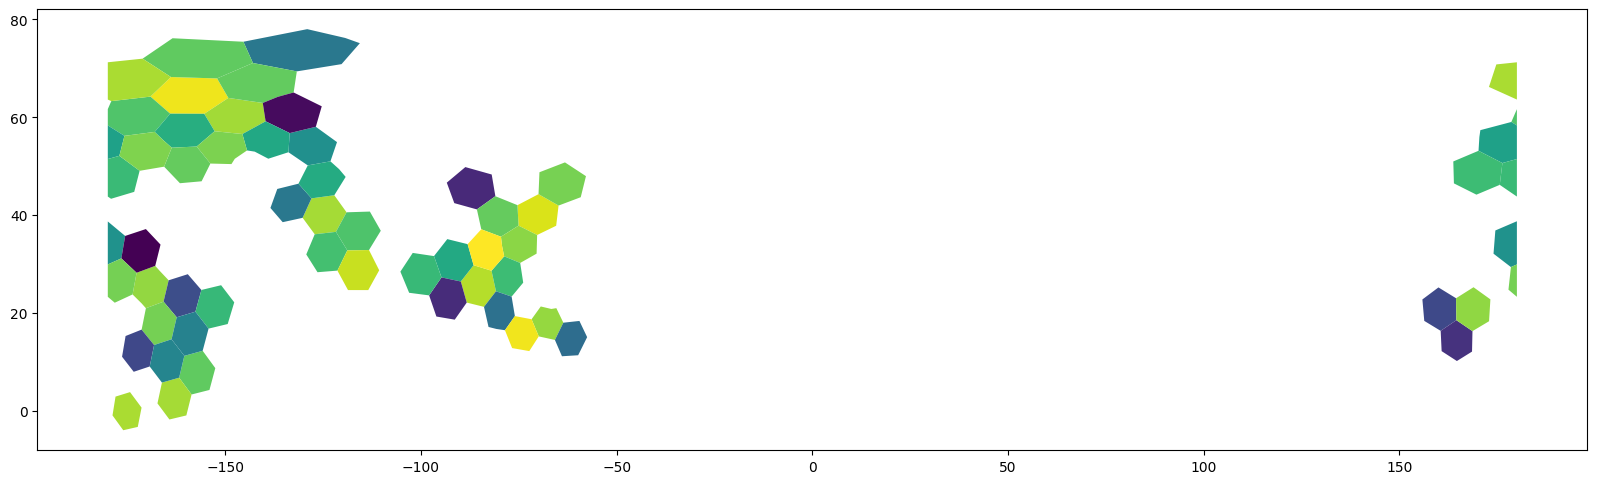

In [5]:
gdf.plot(column='es',
         figsize=(20, 20),)

In [6]:
!pip install mapclassify

In [7]:
gdf.explore(
    column = 'log10_n',
)

In [8]:
m = gdf.explore(
    column = 'n'
)

m.save(url.split('/')[-1].replace('.geojson','.html'))

Create html for all of them

In [10]:
for i in range(1,7):
  url = 'https://raw.githubusercontent.com/NOAA-GIS4Ocean/H3_indicators/main/data/indicators_all_res{}.geojson'.format(i)

  gdf = gpd.read_file(url)
  gdf['log10_n'] = np.log10(gdf['n'])

  m = gdf.explore(
     column = 'log10_n'
     )

  m.save(url.split('/')[-1].replace('.geojson','.html'))